In [18]:
# Playground Series – Season 5 Episode 8 (“Bank Marketing”) EDA Play‑book

## 0  Imports & utility helpers

import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
from pathlib import Path
from scipy import stats

sns.set_theme(style="whitegrid")
DATA_DIR = Path('/kaggle/input/playground-series-s5e8')  # adjust if local


In [19]:
## 1  Load data & quick glance

train = pd.read_csv(DATA_DIR/'train.csv')
test  = pd.read_csv(DATA_DIR/'test.csv')
print(f"train shape = {train.shape} — test shape = {test.shape}")
# train.head()
# train.info()


train.isna().sum().to_frame('n_missing').T

train shape = (750000, 18) — test shape = (250000, 17)


,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
n_missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


y
0    87.93
1    12.07
Name: proportion, dtype: float64


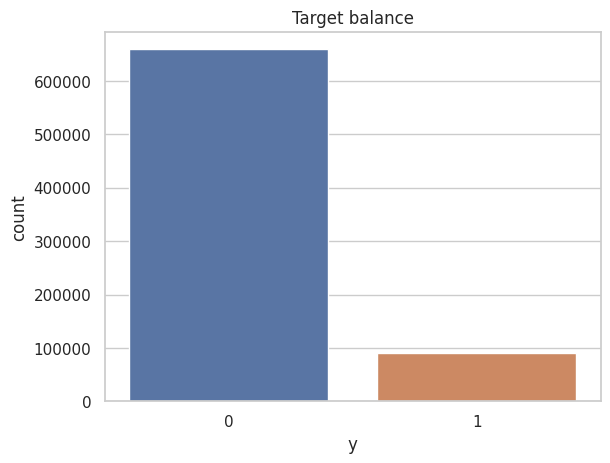

In [3]:
## 2  Target inspection

ax = sns.countplot(x='y', data=train)
ax.set_title('Target balance');
print(train['y'].value_counts(normalize=True).mul(100).round(2))

In [4]:
## 3  Feature type split

num_cols = train.select_dtypes(['int64','float64']).columns.tolist()
cat_cols = [c for c in train.columns if c not in num_cols+['y']]
print('Numeric:', num_cols)  # age, balance, duration, …
print('Categorical:', cat_cols)

Numeric: ['id', 'age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous', 'y']
Categorical: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']


In [5]:
## 4  Numeric summary

train[num_cols].describe().T.assign(skew=train[num_cols].skew())

,count,mean,std,min,25%,50%,75%,max,skew
id,750000.0,374999.500000,216506.495284,0.0,187499.75,374999.5,562499.25,749999.0,0.000000
age,750000.0,40.926395,10.098829,18.0,33.00,39.0,48.00,95.0,0.586137
balance,750000.0,1204.067397,2836.096759,-8019.0,0.00,634.0,1390.00,99717.0,12.304123
day,750000.0,16.117209,8.250832,1.0,9.00,17.0,21.00,31.0,0.054014
duration,750000.0,256.229144,272.555662,1.0,91.00,133.0,361.00,4918.0,2.048776
campaign,750000.0,2.577008,2.718514,1.0,1.00,2.0,3.00,63.0,4.810437
pdays,750000.0,22.412733,77.319998,-1.0,-1.00,-1.0,-1.00,871.0,3.625049
previous,750000.0,0.298545,1.335926,0.0,0.00,0.0,0.00,200.0,13.749885
y,750000.0,0.120651,0.325721,0.0,0.00,0.0,0.00,1.0,2.329296


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


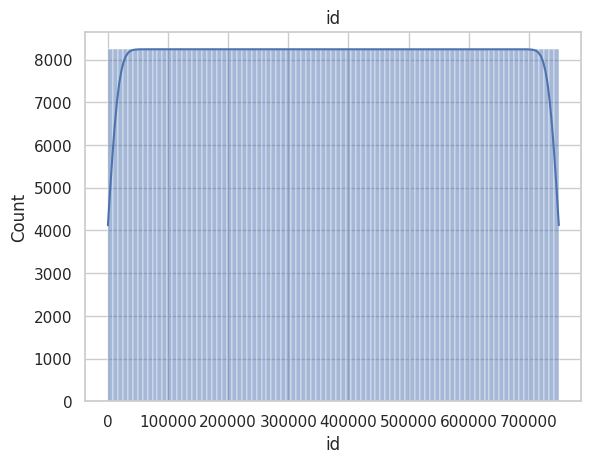

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


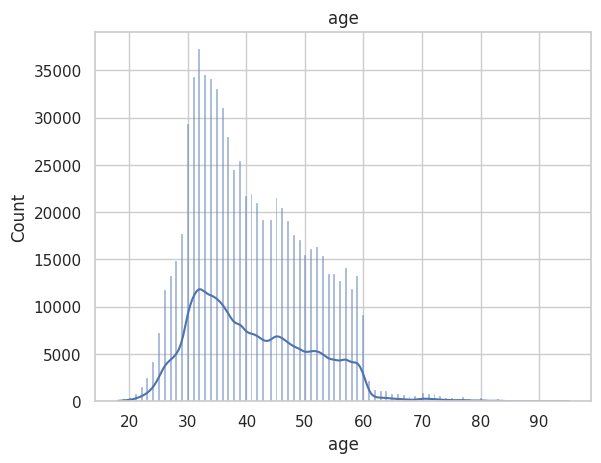

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


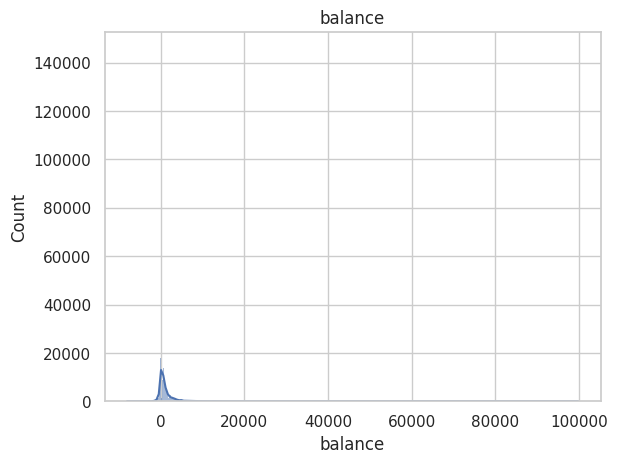

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


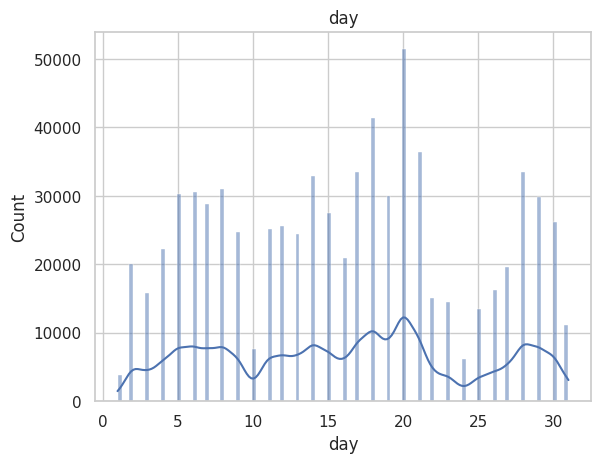

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


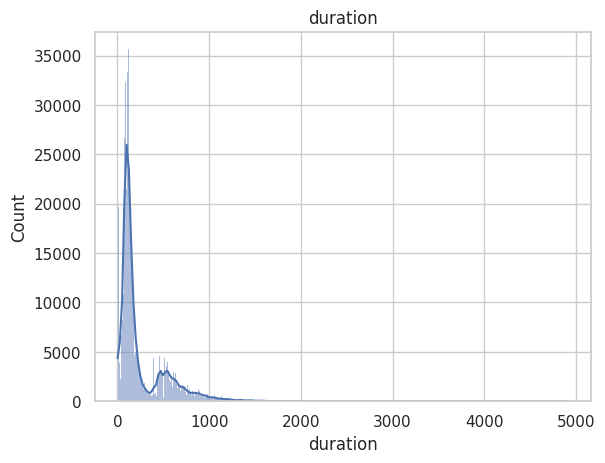

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


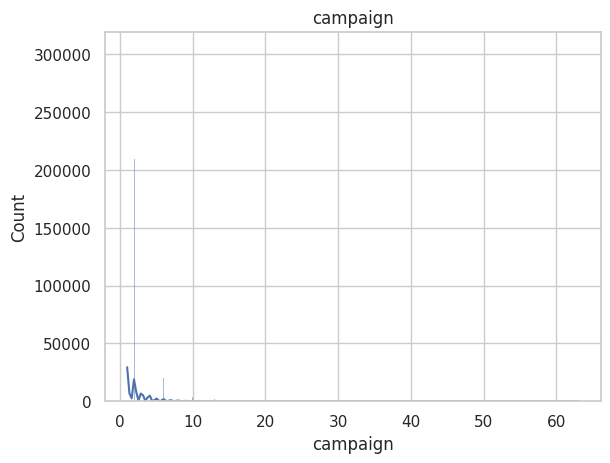

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


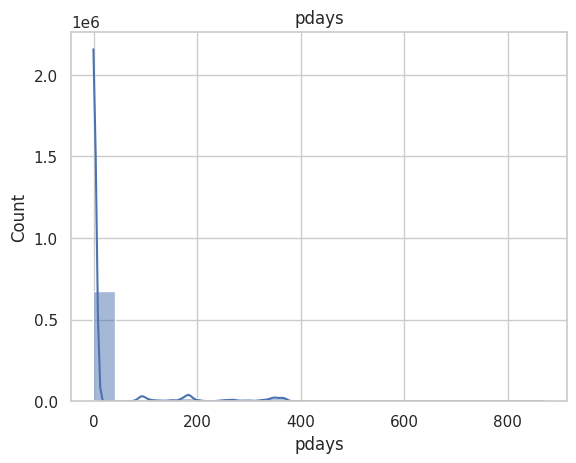

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


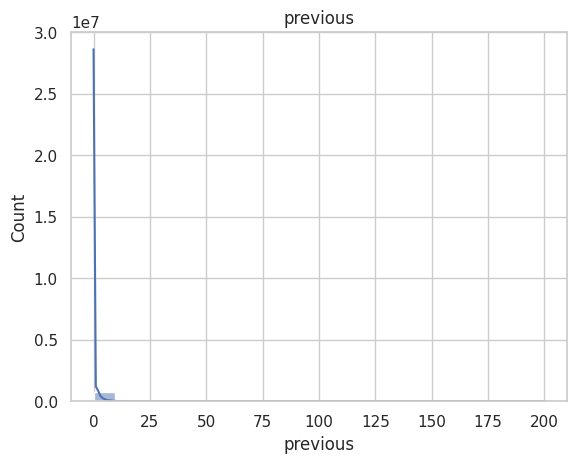

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


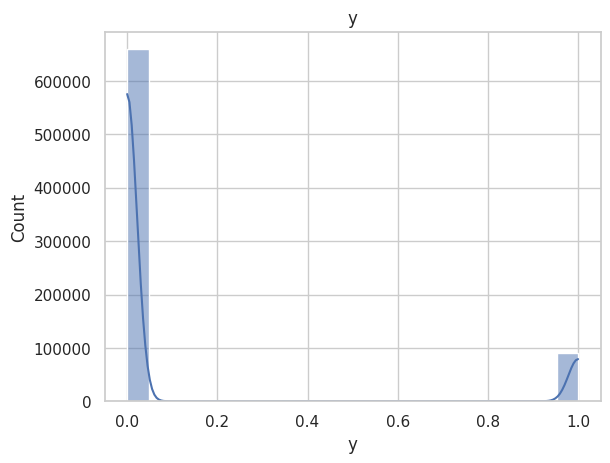

In [6]:
### 4.1  Histograms

for col in num_cols:
    sns.histplot(train[col], kde=True); plt.title(col); plt.show()

In [7]:
## 5  Categorical summary

cat_overview = pd.DataFrame({
    'n_unique': train[cat_cols].nunique(),
    'top_freq%': train[cat_cols].agg(lambda s: s.value_counts(normalize=True).iat[0]*100)
}).sort_values('n_unique')
cat_overview

,n_unique,top_freq%
default,2,98.286800
housing,2,54.838400
loan,2,86.003067
marital,3,64.101200
contact,3,64.887333
education,4,53.557733
poutcome,4,89.660000
job,12,23.405467
month,12,30.454800


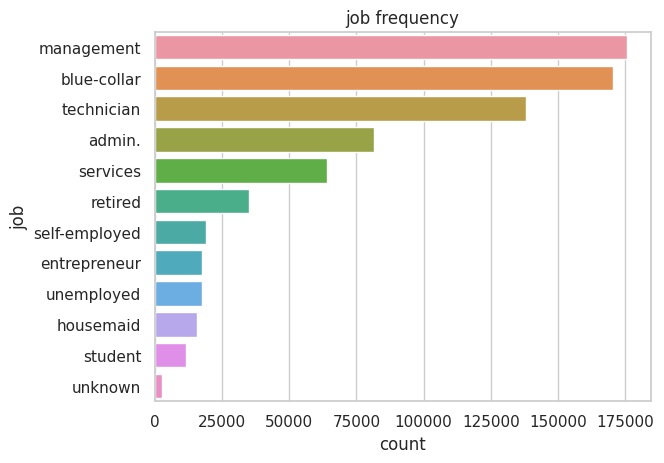

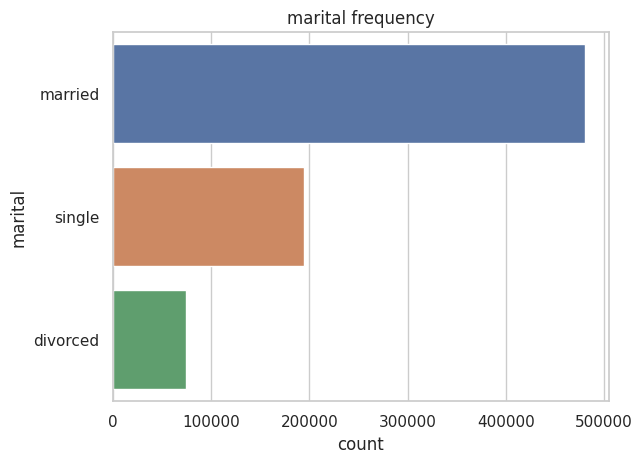

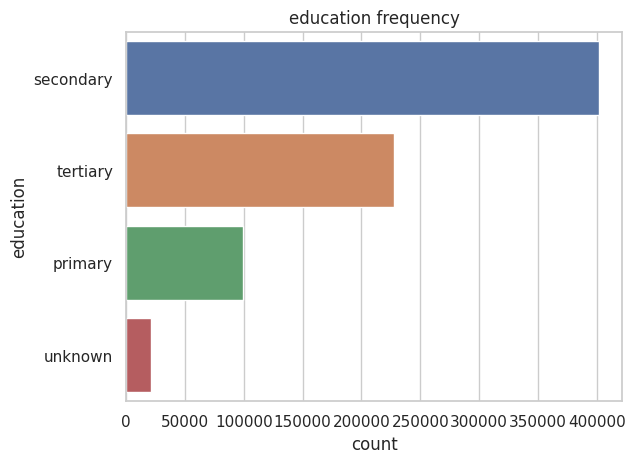

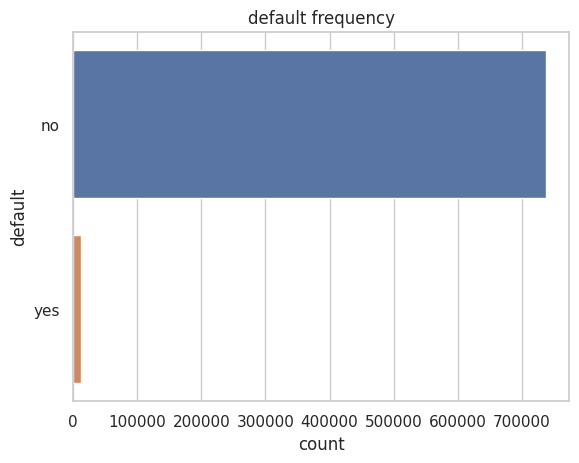

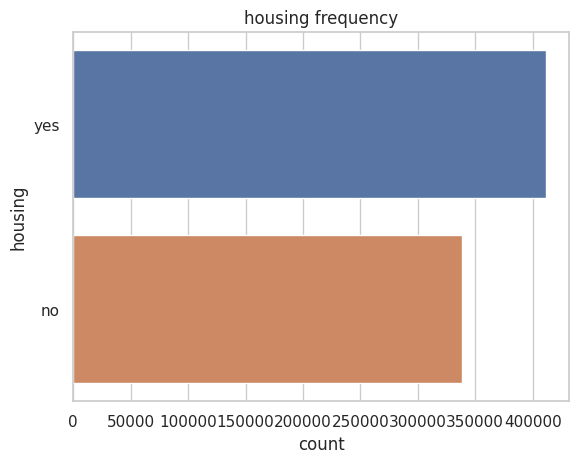

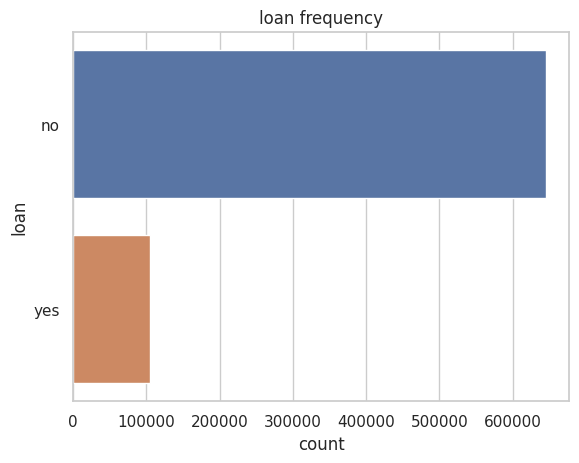

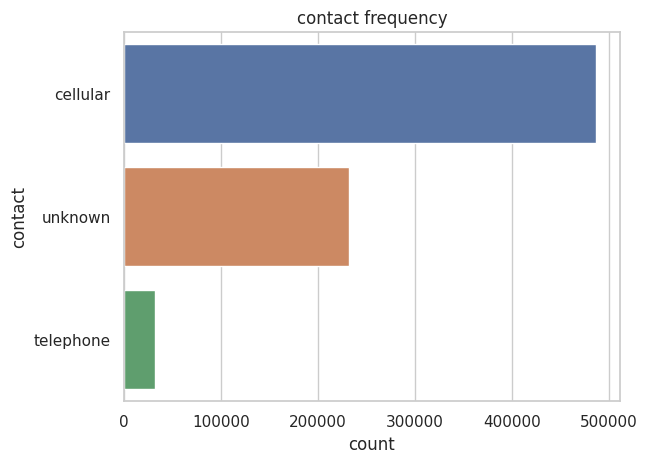

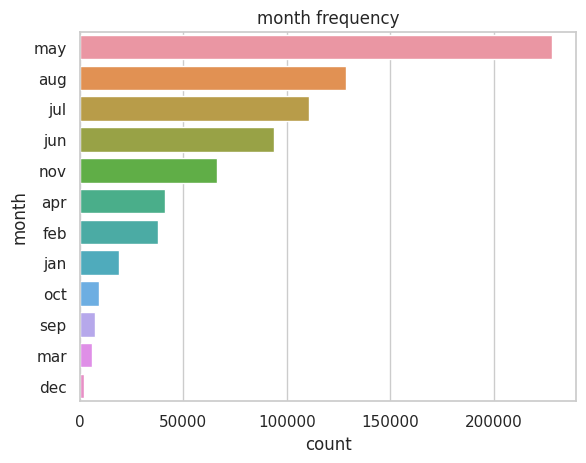

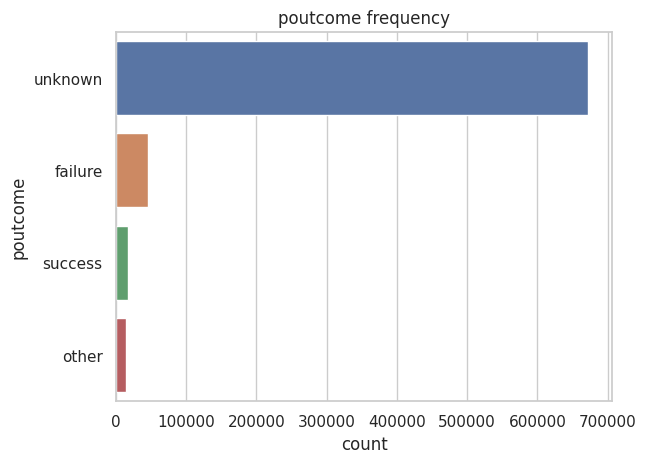

In [8]:
### 5.1  Bar‑plots

for col in cat_cols:
    order = train[col].value_counts().index
    sns.countplot(y=col, data=train, order=order)
    plt.title(f"{col} frequency"); plt.show()

/usr/local/lib/python3.11/dist-packages/scipy/stats/_stats_py.py:4638: RuntimeWarning: invalid value encountered in less
  nconst_y = xp.any(normym < threshold*xp.abs(ymean), axis=axis)
/usr/local/lib/python3.11/dist-packages/scipy/_lib/array_api_compat/common/_aliases.py:354: RuntimeWarning: invalid value encountered in less
  ia = (out < a) | xp.isnan(a)
/usr/local/lib/python3.11/dist-packages/scipy/_lib/array_api_compat/common/_aliases.py:361: RuntimeWarning: invalid value encountered in greater
  ib = (out > b) | xp.isnan(b)
/usr/local/lib/python3.11/dist-packages/scipy/stats/_stats_py.py:4638: RuntimeWarning: invalid value encountered in less
  nconst_y = xp.any(normym < threshold*xp.abs(ymean), axis=axis)
/usr/local/lib/python3.11/dist-packages/scipy/_lib/array_api_compat/common/_aliases.py:354: RuntimeWarning: invalid value encountered in less
  ia = (out < a) | xp.isnan(a)
/usr/local/lib/python3.11/dist-packages/scipy/_lib/array_api_compat/common/_aliases.py:361: RuntimeWarning

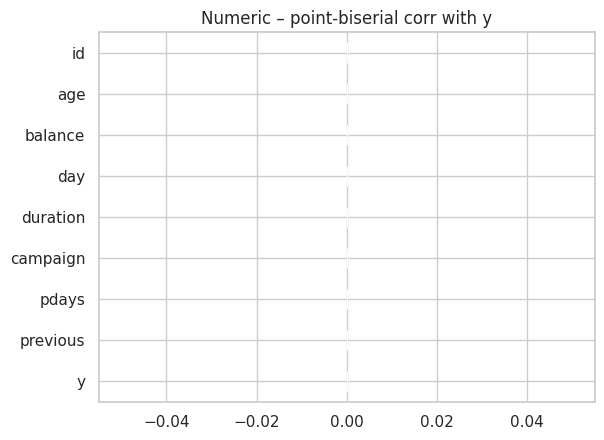

In [9]:
## 6  Bivariate analysis vs target

### 6.1  Numeric ↔ `y`


from scipy.stats import pointbiserialr
pb = {c: pointbiserialr(train[c], train['y'].map({'no':0,'yes':1}))[0] for c in num_cols}
(pd.Series(pb).sort_values(ascending=False)  # correlation table
     .plot.barh(title='Numeric – point‑biserial corr with y'))
plt.gca().invert_yaxis(); plt.show()

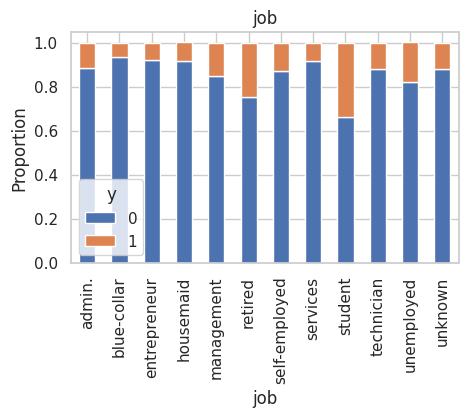

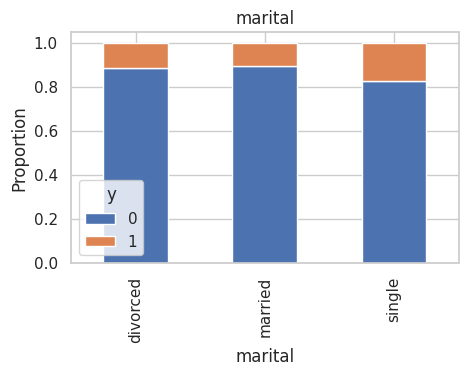

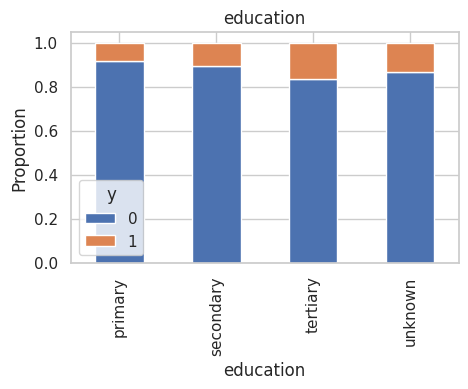

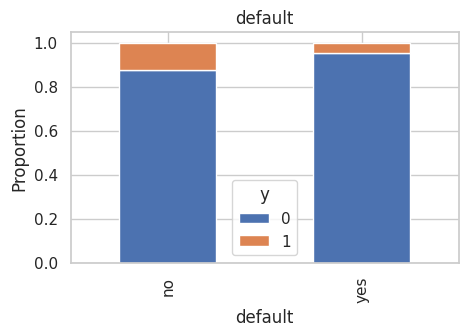

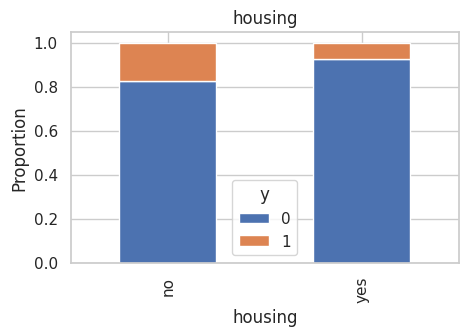

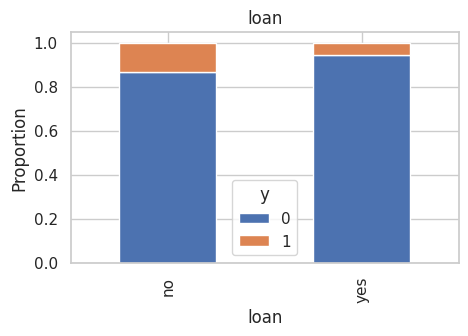

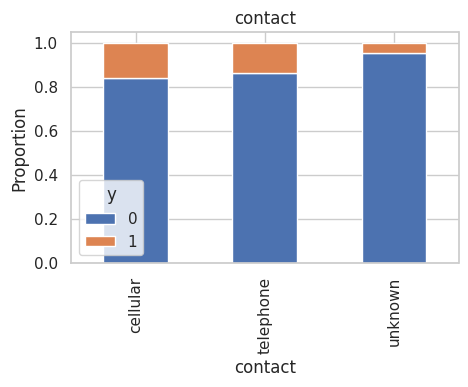

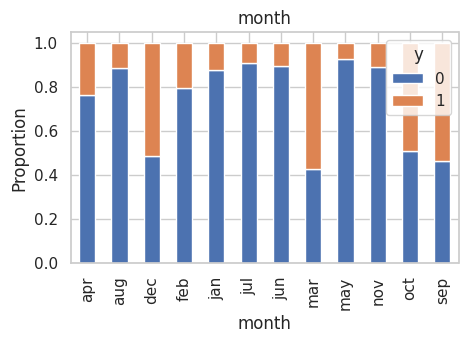

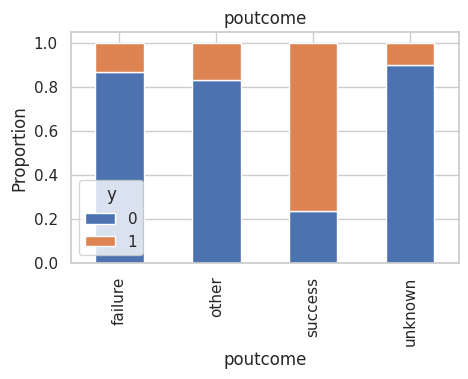

In [12]:
### 6.2  Categorical ↔ `y`

for col in cat_cols:
    ct = pd.crosstab(train[col], train['y'], normalize='index')
    ct.plot.bar(stacked=True, figsize=(5,3), title=col)
    plt.ylabel('Proportion'); plt.show()

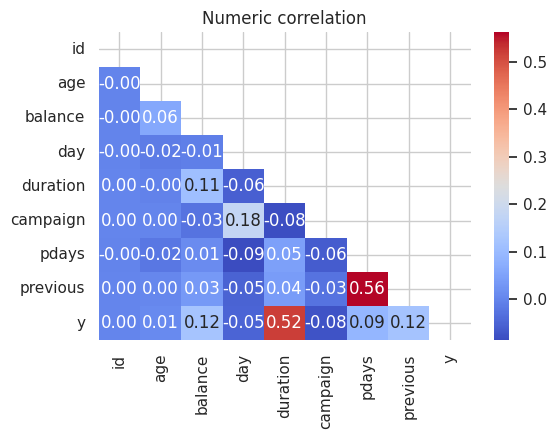

In [13]:
## 7  Correlation & multicollinearity

corr = train[num_cols].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(6,4))
sns.heatmap(corr, mask=mask, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Numeric correlation'); plt.show()

In [ ]:
## 8  Feature engineering tips (optional code stubs)

# Binary flags
train['was_prev_contacted'] = (train['pdays'] != -1)
train['has_prev_calls']     = (train['previous'] > 0)

# Log‑transforms
for col in ['balance','duration','campaign','pdays','previous']:
    train[f'log_{col}'] = np.log1p(train[col] - train[col].min() + 1)

# Cyclical encodings for day / month if using linear models
train['day_sin']   = np.sin(2*np.pi*train['day']  / 31)
train['day_cos']   = np.cos(2*np.pi*train['day']  / 31)
train['month_sin'] = np.sin(2*np.pi*train['month'] / 12)
train['month_cos'] = np.cos(2*np.pi*train['month'] / 12)

In [ ]:

## 9  Save cleaned dataset (optional)

train.to_csv('train_eda.csv', index=False)

## Data Pre-processing

In [20]:
NUM_COLS_ORIG = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
CAT_COLS_ORIG = ['job', 'marital', 'education', 'default', 'housing',
                 'loan', 'contact', 'month', 'poutcome']

LOG_SK_EWED   = ['balance', 'duration', 'campaign', 'pdays', 'previous']

In [21]:
# %% 1 Feature‑engineering helper -------------------------------------------------

def add_features(df: pd.DataFrame) -> pd.DataFrame:
    df = df.copy()

    # Binary flags for pdays / previous (most signal lives in zero vs non‑zero)
    df['was_prev_contacted'] = (df['pdays'] != -1).astype(int)
    df['has_prev_calls']     = (df['previous'] > 0).astype(int)

    # Log‑transforms (shift so min→0)
    for col in LOG_SK_EWED:
        shifted = df[col] - df[col].min() + 1  # ensure positive
        df[f'log_{col}'] = np.log1p(shifted)

    return df

In [25]:
# %% 2 Load --------------------------------------------------------------
train_raw = pd.read_csv(DATA_DIR / 'train.csv')
test_raw  = pd.read_csv(DATA_DIR / 'test.csv')

train = add_features(train_raw)
test  = add_features(test_raw)

# TARGET = train['y'].map({'no': 0, 'yes': 1})
# FEATURES = [c for c in train.columns if c not in {'y', 'id'}]

# Identify final categorical columns (original cats + engineered flags)
CAT_COLS = CAT_COLS_ORIG + ['was_prev_contacted', 'has_prev_calls']
NUM_COLS = [c for c in FEATURES if c not in CAT_COLS]

In [26]:
train = train.drop(columns=['id'])
# test = test.drop(columns=['id'])

In [27]:
train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,previous,poutcome,y,was_prev_contacted,has_prev_calls,log_balance,log_duration,log_campaign,log_pdays,log_previous
0,42,technician,married,secondary,no,7,no,no,cellular,25,...,0,unknown,0,0,0,8.990691,4.770685,1.386294,0.693147,0.693147
1,38,blue-collar,married,secondary,no,514,no,no,unknown,18,...,0,unknown,0,0,0,9.051931,5.225747,0.693147,0.693147,0.693147
2,36,blue-collar,married,secondary,no,602,yes,no,unknown,14,...,0,unknown,0,0,0,9.062188,4.718499,1.098612,0.693147,0.693147
3,27,student,single,secondary,no,34,yes,no,unknown,28,...,0,unknown,0,0,0,8.994048,2.397895,1.098612,0.693147,0.693147
4,26,technician,married,secondary,no,889,yes,no,cellular,3,...,0,unknown,1,0,0,9.094930,6.805723,0.693147,0.693147,0.693147


In [28]:
test.head()

,id,age,job,marital,education,default,balance,housing,loan,contact,...,pdays,previous,poutcome,was_prev_contacted,has_prev_calls,log_balance,log_duration,log_campaign,log_pdays,log_previous
0,750000,32,blue-collar,married,secondary,no,1397,yes,no,unknown,...,-1,0,unknown,0,0,9.150378,5.407172,0.693147,0.693147,0.693147
1,750001,44,management,married,tertiary,no,23,yes,no,cellular,...,-1,0,unknown,0,0,8.992682,6.371612,1.098612,0.693147,0.693147
2,750002,36,self-employed,married,primary,no,46,yes,yes,cellular,...,-1,0,unknown,0,0,8.995537,4.700480,1.098612,0.693147,0.693147
3,750003,58,blue-collar,married,secondary,no,-1380,yes,yes,unknown,...,-1,0,unknown,0,0,8.801018,4.820282,0.693147,0.693147,0.693147
4,750004,28,technician,single,secondary,no,1950,yes,no,cellular,...,-1,0,unknown,0,0,9.207436,5.192957,0.693147,0.693147,0.693147


In [29]:
train.to_csv('train_final.csv', index=False)
test.to_csv('test_final.csv', index=False)

## 10  Next modelling notebook

1. **Split**: stratified K‑fold by `y` (e.g. 5 folds).
2. **Encoder**: OneHotEncoder for cats → Gradient Boosting **(LightGBM / CatBoost)**.
3. **Metrics**: AUC, ROC curve per fold.
4. **Tune** & **ensemble** (trees + logistic + NN) for final LB push.

In [30]:
import pandas as pd
import numpy as np
import catboost as cb
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score

# 1. Load data
train = pd.read_csv('/kaggle/working/train_final.csv')
test  = pd.read_csv('/kaggle/working/test_final.csv')

# X, y = train.drop('deposit', axis=1), train['deposit']
# cat_cols = X.select_dtypes(include='object').columns.tolist()
X, y = train.drop('y', axis=1), train['y']


In [31]:
y[:10]

0    0
1    0
2    0
3    0
4    1
5    0
6    0
7    0
8    0
9    0
Name: y, dtype: int64

In [32]:
# 2. Cross‑validation setup
N_FOLDS, SEED = 5, 42
skf = StratifiedKFold(n_splits=N_FOLDS, shuffle=True, random_state=SEED)

oof   = np.zeros(len(X))
preds = np.zeros(len(test))

In [33]:
cat_cols = CAT_COLS

In [34]:
model = cb.CatBoostClassifier(
        iterations=4000,
        loss_function='Logloss',
        learning_rate=0.03,
        depth=7,
        task_type='GPU',   # <‑‑ key line: use CUDA device 0
        devices='0',       # leave default if only one GPU
        eval_metric='AUC',
        class_weights=[1, 4],
        cat_features=cat_cols,
        random_state=SEED,
        verbose=200,
        early_stopping_rounds=200,
    )

In [35]:
# 3. Fold loop – GPU CatBoost
for fold, (tr_idx, val_idx) in enumerate(skf.split(X, y)):
    print(f"Fold {fold+1}/{N_FOLDS} (GPU)")
    X_tr, X_val = X.iloc[tr_idx], X.iloc[val_idx]
    y_tr, y_val = y.iloc[tr_idx], y.iloc[val_idx]

    model.fit(X_tr, y_tr, eval_set=(X_val, y_val), use_best_model=True)

    oof[val_idx] = model.predict_proba(X_val)[:, 1]
    # preds       += model.predict_proba(test)[:, 1] / N_FOLDS

Fold 1/5 (GPU)


Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.9289105	best: 0.9289105 (0)	total: 55.6ms	remaining: 3m 42s
200:	test: 0.9605635	best: 0.9605635 (200)	total: 10.5s	remaining: 3m 18s
400:	test: 0.9634489	best: 0.9634489 (400)	total: 20.9s	remaining: 3m 7s
600:	test: 0.9644952	best: 0.9644952 (600)	total: 31.2s	remaining: 2m 56s
800:	test: 0.9650808	best: 0.9650808 (800)	total: 41.5s	remaining: 2m 45s
1000:	test: 0.9654846	best: 0.9654846 (1000)	total: 51.9s	remaining: 2m 35s
1200:	test: 0.9657791	best: 0.9657791 (1200)	total: 1m 2s	remaining: 2m 25s
1400:	test: 0.9660273	best: 0.9660273 (1400)	total: 1m 12s	remaining: 2m 14s
1600:	test: 0.9662190	best: 0.9662190 (1600)	total: 1m 23s	remaining: 2m 4s
1800:	test: 0.9663804	best: 0.9663804 (1800)	total: 1m 33s	remaining: 1m 54s
2000:	test: 0.9664873	best: 0.9664879 (1993)	total: 1m 44s	remaining: 1m 44s
2200:	test: 0.9665983	best: 0.9665993 (2197)	total: 1m 54s	remaining: 1m 33s
2400:	test: 0.9666939	best: 0.9666939 (2400)	total: 2m 5s	remaining: 1m 23s
2600:	test: 0.9667704	

Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.9270851	best: 0.9270851 (0)	total: 54.5ms	remaining: 3m 37s
200:	test: 0.9596705	best: 0.9596705 (200)	total: 10.5s	remaining: 3m 18s
400:	test: 0.9622263	best: 0.9622263 (400)	total: 21s	remaining: 3m 8s
600:	test: 0.9633475	best: 0.9633475 (600)	total: 31.3s	remaining: 2m 57s
800:	test: 0.9639716	best: 0.9639716 (800)	total: 41.8s	remaining: 2m 46s
1000:	test: 0.9643961	best: 0.9643961 (1000)	total: 52.1s	remaining: 2m 36s
1200:	test: 0.9646658	best: 0.9646658 (1200)	total: 1m 2s	remaining: 2m 25s
1400:	test: 0.9649156	best: 0.9649156 (1400)	total: 1m 12s	remaining: 2m 15s
1600:	test: 0.9650827	best: 0.9650827 (1600)	total: 1m 23s	remaining: 2m 4s
1800:	test: 0.9652459	best: 0.9652459 (1800)	total: 1m 33s	remaining: 1m 54s
2000:	test: 0.9653789	best: 0.9653789 (2000)	total: 1m 44s	remaining: 1m 44s
2200:	test: 0.9654868	best: 0.9654868 (2199)	total: 1m 54s	remaining: 1m 33s
2400:	test: 0.9655829	best: 0.9655829 (2400)	total: 2m 5s	remaining: 1m 23s
2600:	test: 0.9656555	be

Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.9282356	best: 0.9282356 (0)	total: 55.5ms	remaining: 3m 42s
200:	test: 0.9592487	best: 0.9592487 (200)	total: 10.5s	remaining: 3m 18s
400:	test: 0.9621546	best: 0.9621546 (400)	total: 20.8s	remaining: 3m 7s
600:	test: 0.9632795	best: 0.9632795 (600)	total: 31.1s	remaining: 2m 55s
800:	test: 0.9638935	best: 0.9638935 (800)	total: 41.5s	remaining: 2m 45s
1000:	test: 0.9643422	best: 0.9643422 (1000)	total: 51.8s	remaining: 2m 35s
1200:	test: 0.9646280	best: 0.9646280 (1200)	total: 1m 2s	remaining: 2m 25s
1400:	test: 0.9648608	best: 0.9648609 (1399)	total: 1m 12s	remaining: 2m 14s
1600:	test: 0.9650916	best: 0.9650925 (1598)	total: 1m 23s	remaining: 2m 4s
1800:	test: 0.9652471	best: 0.9652471 (1800)	total: 1m 33s	remaining: 1m 54s
2000:	test: 0.9653750	best: 0.9653752 (1999)	total: 1m 44s	remaining: 1m 44s
2200:	test: 0.9654940	best: 0.9654945 (2197)	total: 1m 54s	remaining: 1m 33s
2400:	test: 0.9655839	best: 0.9655839 (2400)	total: 2m 5s	remaining: 1m 23s
2600:	test: 0.9656787	

Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.9276276	best: 0.9276276 (0)	total: 54.7ms	remaining: 3m 38s
200:	test: 0.9605666	best: 0.9605666 (200)	total: 10.5s	remaining: 3m 17s
400:	test: 0.9632031	best: 0.9632031 (400)	total: 20.7s	remaining: 3m 6s
600:	test: 0.9642836	best: 0.9642836 (600)	total: 31s	remaining: 2m 55s
800:	test: 0.9648583	best: 0.9648583 (800)	total: 41.4s	remaining: 2m 45s
1000:	test: 0.9652520	best: 0.9652520 (1000)	total: 51.8s	remaining: 2m 35s
1200:	test: 0.9655327	best: 0.9655327 (1200)	total: 1m 2s	remaining: 2m 24s
1400:	test: 0.9657581	best: 0.9657587 (1397)	total: 1m 12s	remaining: 2m 14s
1600:	test: 0.9659644	best: 0.9659644 (1600)	total: 1m 22s	remaining: 2m 4s
1800:	test: 0.9660918	best: 0.9660918 (1800)	total: 1m 33s	remaining: 1m 54s
2000:	test: 0.9662123	best: 0.9662133 (1995)	total: 1m 43s	remaining: 1m 43s
2200:	test: 0.9663154	best: 0.9663157 (2198)	total: 1m 54s	remaining: 1m 33s
2400:	test: 0.9664056	best: 0.9664056 (2400)	total: 2m 4s	remaining: 1m 23s
2600:	test: 0.9664877	be

Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.9291864	best: 0.9291864 (0)	total: 55.8ms	remaining: 3m 43s
200:	test: 0.9599631	best: 0.9599631 (200)	total: 10.5s	remaining: 3m 18s
400:	test: 0.9627212	best: 0.9627212 (400)	total: 20.9s	remaining: 3m 7s
600:	test: 0.9638292	best: 0.9638292 (600)	total: 31.2s	remaining: 2m 56s
800:	test: 0.9643670	best: 0.9643670 (800)	total: 41.7s	remaining: 2m 46s
1000:	test: 0.9647858	best: 0.9647858 (1000)	total: 52s	remaining: 2m 35s
1200:	test: 0.9650725	best: 0.9650725 (1200)	total: 1m 2s	remaining: 2m 25s
1400:	test: 0.9653010	best: 0.9653016 (1398)	total: 1m 12s	remaining: 2m 15s
1600:	test: 0.9654838	best: 0.9654838 (1600)	total: 1m 23s	remaining: 2m 4s
1800:	test: 0.9656112	best: 0.9656116 (1799)	total: 1m 33s	remaining: 1m 54s
2000:	test: 0.9657342	best: 0.9657345 (1996)	total: 1m 44s	remaining: 1m 44s
2200:	test: 0.9658481	best: 0.9658483 (2199)	total: 1m 54s	remaining: 1m 33s
2400:	test: 0.9659222	best: 0.9659222 (2400)	total: 2m 5s	remaining: 1m 23s
2600:	test: 0.9659947	be

In [36]:
# 4. Evaluation
print('\nOOF ROC‑AUC:', roc_auc_score(y, oof))


OOF ROC‑AUC: 0.9664462061810438


In [37]:
test.head()

,id,age,job,marital,education,default,balance,housing,loan,contact,...,pdays,previous,poutcome,was_prev_contacted,has_prev_calls,log_balance,log_duration,log_campaign,log_pdays,log_previous
0,750000,32,blue-collar,married,secondary,no,1397,yes,no,unknown,...,-1,0,unknown,0,0,9.150378,5.407172,0.693147,0.693147,0.693147
1,750001,44,management,married,tertiary,no,23,yes,no,cellular,...,-1,0,unknown,0,0,8.992682,6.371612,1.098612,0.693147,0.693147
2,750002,36,self-employed,married,primary,no,46,yes,yes,cellular,...,-1,0,unknown,0,0,8.995537,4.700480,1.098612,0.693147,0.693147
3,750003,58,blue-collar,married,secondary,no,-1380,yes,yes,unknown,...,-1,0,unknown,0,0,8.801018,4.820282,0.693147,0.693147,0.693147
4,750004,28,technician,single,secondary,no,1950,yes,no,cellular,...,-1,0,unknown,0,0,9.207436,5.192957,0.693147,0.693147,0.693147


In [50]:
preds = model.predict_proba(test.drop(columns=['id']))[:, 1]

In [51]:
preds[:10]

array([6.62511346e-03, 3.52272309e-01, 5.58074221e-04, 1.65568873e-05,
       7.26857072e-02, 5.80507551e-03, 5.26080151e-01, 6.19070959e-01,
       3.93513607e-02, 6.02181718e-01])

In [52]:
# test  = pd.read_csv(DATA_DIR/'test.csv')
submission = pd.DataFrame({'id': test['id'], 'y': preds})
submission.to_csv('submission.csv', index=False)
submission.head(10)

,id,y
0,750000,0.006625
1,750001,0.352272
2,750002,0.000558
3,750003,0.000017
4,750004,0.072686
5,750005,0.005805
6,750006,0.526080
7,750007,0.619071
8,750008,0.039351
9,750009,0.602182


In [ ]:
ax_test = sns.countplot(x='y', data=submission)
ax_test.set_title('Target balance');
print(submission['y'].value_counts(normalize=True).mul(100).round(2))

y
0.001119    0.0
0.006194    0.0
0.001030    0.0
0.000207    0.0
0.000215    0.0
           ... 
0.002559    0.0
0.017909    0.0
0.194196    0.0
0.002380    0.0
0.000186    0.0
Name: proportion, Length: 249905, dtype: float64
